## Example how to use tfeat descriptor

In [1]:
import tfeat_model
import use_tfeat
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

### Load and initialize tfeat model.

In [3]:
model = use_tfeat.load_tfeat()

#### Load images

In [4]:
img1 = cv2.imread('../data/v_churchill/1.ppm', 0)
img2 = cv2.imread('../data/v_churchill/4.ppm', 0)

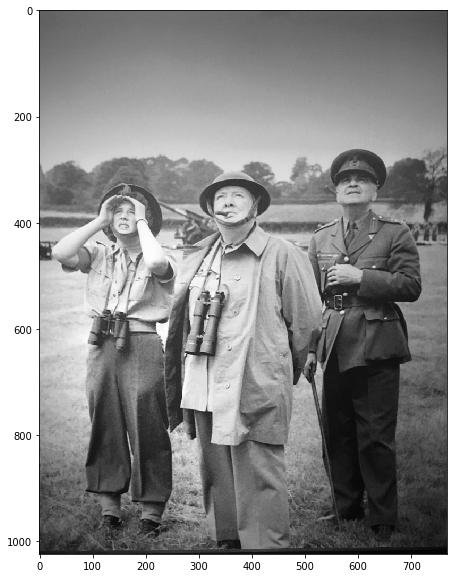

In [5]:
plt.imshow(img1, cmap='gray')
plt.show()

#### Load detector and compute keypoints

In [6]:
brisk = cv2.BRISK_create()
kp1, _ = brisk.detectAndCompute(img1, None)
kp2, _ = brisk.detectAndCompute(img2, None)

### Get rectified patches from keypoints

In [7]:
patches1 = use_tfeat.rectify_patches(img1, kp1, 32, 3)
patches2 = use_tfeat.rectify_patches(img2, kp2, 32, 3)

### Compute descriptors from patches

In [9]:
desc1 = use_tfeat.compute_descriptors(model, patches1)
desc2 = use_tfeat.compute_descriptors(model, patches2)

#### Create Matcher and find matching descriptors

In [11]:
bf = cv2.BFMatcher(cv2.NORM_L2)

In [12]:
matches = bf.knnMatch(desc1, desc2, k=2)

In [13]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])

In [34]:
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, 0, flags=2)

#### Present results

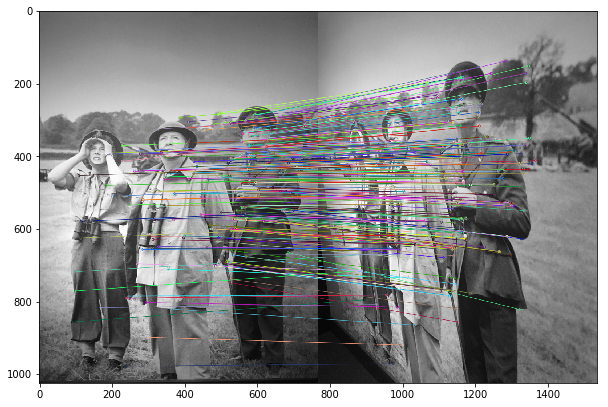

In [35]:
plt.imshow(img3)
plt.show()